In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Titanic_train.csv")

In [3]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


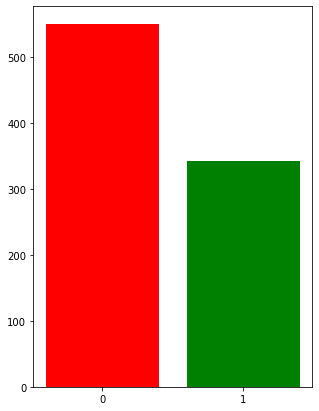

In [5]:
value=data["Survived"].value_counts()
plt.figure(figsize=(5,7))
plt.subplot(111)
plt.bar(['0','1'],[value[0],value[1]],color=["red","green"]) #The quotes on 0 and 1 are to make them categorical values
plt.show()

In [6]:
#Checking the number of deaths related to sex
data.loc[data["Sex"]=="male","Survived"].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [7]:
data.loc[data["Sex"]=="female","Survived"].value_counts()

1    233
0     81
Name: Survived, dtype: int64

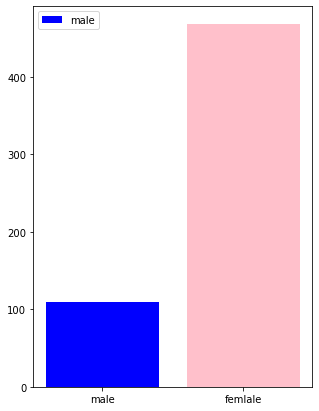

In [8]:
#plotting the survived and sex relation graph
male=data.loc[data["Sex"]=="male","Survived"].value_counts()
female=data.loc[data["Sex"]=="male","Survived"].value_counts()
plt.figure(figsize=(5,7))
plt.subplot(111)
plt.bar(['male','femlale'],[male[1],female[0]],color=["blue","pink"]) 
plt.legend(["male","female"])
plt.show()

In [9]:
#Checking with respect to class,death and survival rate
upper=data.loc[data["Pclass"]==3,"Survived"].value_counts()
middle=data.loc[data["Pclass"]==2,"Survived"].value_counts()
lower=data.loc[data["Pclass"]==1,"Survived"].value_counts()

<BarContainer object of 3 artists>

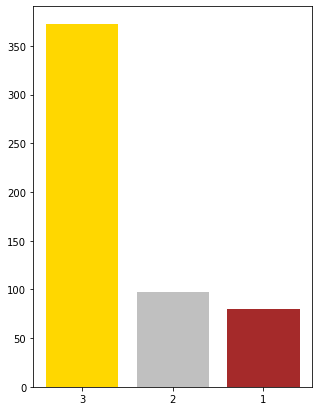

In [10]:
plt.figure(figsize=(5,7))
plt.subplot(111)
plt.bar(['3','2','1'],[upper[0],middle[0],lower[0]],color=["gold","silver","brown"])

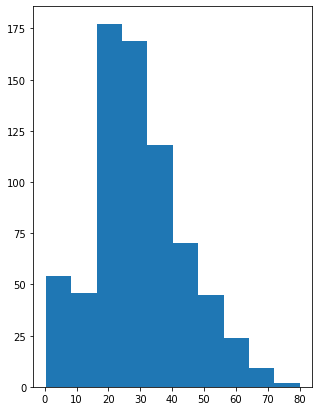

In [11]:
#Checking the age distribution 
plt.figure(figsize=(5,7))
plt.subplot(111)
plt.hist(data["Age"])
plt.show()

In [12]:
#Now since we have a good about the data we can start working on our model

CLEANING DATA

In [13]:
#The next step is to clean our data 
#This includes:
#1)Looking for NAN values and replacing them with unknown or 0
#2)Dropping columns that won't help us in our prediction
#3)convert non numerical values to categorical

1)Replacing Null values

In [14]:
data["Age"].isnull().value_counts() #With isnull we can check for nan values in a particular column

False    714
True     177
Name: Age, dtype: int64

In [15]:
mean=data["Age"].mean() #we will replace the nan values with the mean of the age 
data["Age"].fillna(mean,inplace=True) #Inplace=True will fill the values in this coulmn itself,else it will create a new column and replace the current one 

In [16]:
#No more NAN Values for Age column
data["Age"].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [17]:
#Checking for other columns as well
data["Survived"].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [18]:
data["Pclass"].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [19]:
data["Sex"].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [20]:
data["SibSp"].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [21]:
data["Parch"].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [22]:
data["Fare"].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [23]:
data["Embarked"].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [24]:
data["Embarked"].fillna("U",inplace=True)#Filling with unknown token

In [25]:
data["Embarked"].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

2)Dropping not required columns

In [26]:
#Now we will be dropiing the coulnmns we don't need for our model
#Note:However you can extract some information from these columns as well but to keep things simple we will be dropping them 

In [27]:
data=data.drop(["Name","Cabin","PassengerId","Ticket"],axis=1)

3)Converting to categorical

In [28]:
#Their are two columns that we will convert to categorical here
#1)The sex column
#2)The embarked column

In [29]:
data["Sex"].replace(["male","female"],value=[0,1],inplace=True)

In [30]:
data["Embarked"].replace(["C","Q","S","U"],value=[0,1,2,3],inplace=True)

In [31]:
#Now our data is all cleaned up

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,2
1,1,1,1,38.000000,1,0,71.2833,0
2,1,3,1,26.000000,0,0,7.9250,2
3,1,1,1,35.000000,1,0,53.1000,2
4,0,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2
887,1,1,1,19.000000,0,0,30.0000,2
888,0,3,1,29.699118,1,2,23.4500,2
889,1,1,0,26.000000,0,0,30.0000,0


In [33]:
#Now we can start to create our model

CREATING THE MODEL

In [34]:
#splitting the data into training and testing

In [35]:
m,n=data.shape

In [35]:
data_validation=data[0:170]
data_train=data

In [36]:
data_validation.shape

(170, 8)

In [37]:
data_train.shape

(891, 8)

In [38]:
#Splitting into input and output data

In [39]:
X_train=data_train
X_train=X_train.drop(["Survived"],axis=1)
Y_train=data_train["Survived"]

X_val=data_validation
X_val=X_val.drop(["Survived"],axis=1)
Y_val=data_validation["Survived"]

In [40]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_val=np.array(X_val)
Y_val=np.array(Y_val)

In [41]:
X_train.shape

(891, 7)

In [42]:
Y_train.shape

(891,)

In [43]:
Y_train = Y_train.astype('float64')

Normalizing data using mean normalization

In [44]:
def Normalize(x):
    mean=x.mean()
    std=np.std(x)
    x=(x-mean)/std
    return x

In [45]:
X_train[:,2]=Normalize(X_train[:,2])
X_train[:,5]=Normalize(X_train[:,5])

In [46]:
X_val[:,2]=Normalize(X_val[:,2])
X_val[:,5]=Normalize(X_val[:,5])

In [47]:
#Now since we got our data we can start creating our model

In [48]:
X_train[:,5].std()

1.0

Creating Model

In [70]:
class LogisticRegression(object):
    def __init__(self,X,Y):
        self.weights=np.random.randn(X.shape[1],1)/np.sqrt(X.shape[1])
        self.bias=0.
    def GD(self,X_train,Y_train,iterations,learning_rate):
        n=len(X_train)
        training_cost=[]
        for i in range(iterations):
            cost=0.0
            m=0
            for x,y in zip(X_train,Y_train):
                x=x.reshape(1,len(x))
                z=self.feedforward(x)
                prediction=self.sigmoid(z)
                delta_cost=prediction-y
                delta_weights=(1/n)*(x.T*delta_cost)
                delta_bias=delta_cost
                self.weights=self.weights-(learning_rate*delta_weights) 
                self.bias=self.bias-(learning_rate*delta_bias) 
                cost+=self.cross_entropy_cost(prediction,y,n)
                m+=self.get_accuracy(prediction,y)
            cost=np.squeeze(cost)
            training_cost.append(cost)
            if (i+1)%1000==0:
                print(f"Epoch:{i+1},accuracy={(m/891)*100}")
            #print(f"Epoch:{i}")
            #print(prediction)
        return training_cost

    
    def feedforward(self,x):
        return np.dot(x,self.weights)+self.bias
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def get_accuracy(self,a,y):
        predict=self.get_prediction(a)
        if predict==y:
            return 1
        else:
            return 0
    
    def get_prediction(self,x):
        if x>=0.5:
            return 1
        else:
            return 0
    def cross_entropy_cost(self,y_pred,y,n):
        return (1/n)*(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))

In [ ]:
LR=LogisticRegression(X_train,Y_train)
training_cost=LR.GD(X_train,Y_train,40000,0.001)

In [74]:
data_test=pd.read_csv("Titanic_test.csv")

In [75]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
X_test=data_test

In [77]:
X_test=X_test.drop(["Name","Cabin","PassengerId","Ticket"],axis=1)

In [78]:
X_test["Age"].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [79]:
X_test["Sex"].replace(["male","female"],value=[0,1],inplace=True)
mean=X_test["Age"].mean() #we will replace the nan values with the mean of the age 
X_test["Age"].fillna(mean,inplace=True)
X_test["Embarked"].replace(["C","Q","S","U"],value=[0,1,2,3],inplace=True)

In [80]:
X_test.isnull().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       417
                                    True   False         1
dtype: int64

In [81]:
mean_fare=X_test["Fare"].mean()
X_test["Fare"].fillna(mean_fare,inplace=True)

In [82]:
X_test.isnull().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       418
dtype: int64

In [83]:
X_test=np.array(X_test)

In [84]:
X_test[:,2]=Normalize(X_test[:,2])
X_test[:,5]=Normalize(X_test[:,5])

In [85]:
p=[]
for i in range(418):
    predict=LR.feedforward(X_test[i])
    y_pred=LR.get_prediction(predict)
    p.append(y_pred)

In [86]:
index=[]
i=892
while i!=1310:
    index.append(i)
    i+=1

In [87]:
submissions_titanic=pd.DataFrame(index,columns=["PassengerId"])

In [88]:
submissions_titanic["Survived"]=p

In [89]:
submissions_titanic.to_csv("submissions_titanic.csv",index=None)

In [90]:
submissions_titanic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
